In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')


Fitting ODEs with the Levenberg–Marquardt algorithm 
===

## 1D example

[[Fit Statistics]]
    # function evals   = 29
    # data points      = 10
    # variables        = 3
    chi-square         = 10.080
    reduced chi-square = 1.440
[[Variables]]
    x0:   10.1714231 +/- 1.156777 (11.37%) (init= 10.54454)
    a:    2.56428320 +/- 1.700899 (66.33%) (init= 1)
    b:    0.52952597 +/- 0.296358 (55.97%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      =  0.989 
    C(x0, b)                     =  0.453 
    C(x0, a)                     =  0.416 


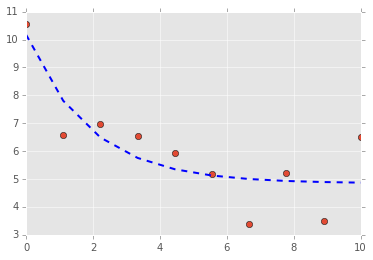

In [2]:
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

def f(xs, t, ps):
    """Receptor synthesis-internalization model."""
    try:
        a = ps['a'].value
        b = ps['b'].value
    except:
        a, b = ps
    x = xs

    return a - b*x

def g(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps, ts, data):
    x0 = ps['x0'].value
    model = g(ts, x0, ps)
    return (model - data).ravel()

a = 2.0
b = 0.5
true_params = [a, b]
x0 = 10.0

t = np.linspace(0, 10, 10)
data = g(t, x0, true_params)
data += np.random.normal(size=data.shape)

# set parameters incluing bounds
params = Parameters()
params.add('x0', value=float(data[0]), min=0, max=100)  
params.add('a', value= 1.0, min=0, max=10)
params.add('b', value= 1.0, min=0, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq')
final = data + result.residual.reshape(data.shape)

# plot data and fitted curves
plt.plot(t, data, 'o')
plt.plot(t, final, '--', linewidth=2, c='blue');

# display fitted statistics
report_fit(result)

## 2D example

[[Fit Statistics]]
    # function evals   = 106
    # data points      = 200
    # variables        = 6
    chi-square         = 195.573
    reduced chi-square = 1.008
[[Variables]]
    x0:   0.67757793 +/- 0.140751 (20.77%) (init= 0.9195372)
    y0:   0.85617400 +/- 0.093697 (10.94%) (init= 0.7862886)
    a:    3.72520718 +/- 0.423963 (11.38%) (init= 2)
    b:    1.27267136 +/- 0.137525 (10.81%) (init= 1)
    c:    1.03706693 +/- 0.087761 (8.46%) (init= 1)
    d:    0.91828915 +/- 0.074839 (8.15%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      =  0.953 
    C(a, d)                      = -0.926 
    C(x0, b)                     = -0.842 
    C(x0, a)                     = -0.829 
    C(b, d)                      = -0.822 
    C(y0, d)                     = -0.772 
    C(y0, c)                     = -0.686 
    C(x0, d)                     =  0.622 
    C(c, d)                      =  0.571 
    C(y0, a)                     =  0.516 


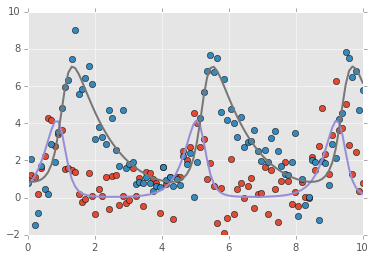

In [4]:
def f(xs, t, ps):
    """Lotka-Volterra predator-prey model."""
    try:
        a = ps['a'].value
        b = ps['b'].value
        c = ps['c'].value
        d = ps['d'].value
    except:
        a, b, c, d = ps
        
    x, y = xs
    return [a*x - b*x*y, c*x*y - d*y]

def g(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps, ts, data):
    x0 = ps['x0'].value, ps['y0'].value
    model = g(ts, x0, ps)
    return (model - data).ravel()

t = np.linspace(0, 10, 100)
x0 = np.array([1,1])

a, b, c, d = 3,1,1,1
true_params = np.array((a, b, c, d))
data = g(t, x0, true_params)
data += np.random.normal(size=data.shape)

# set parameters incluing bounds
params = Parameters()
params.add('x0', value= float(data[0, 0]), min=0, max=10)  
params.add('y0', value=float(data[0, 1]), min=0, max=10)  
params.add('a', value=2.0, min=0, max=10)
params.add('b', value=1.0, min=0, max=10)
params.add('c', value=1.0, min=0, max=10)
params.add('d', value=1.0, min=0, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq')
final = data + result.residual.reshape(data.shape)

# plot data and fitted curves
plt.plot(t, data, 'o')
plt.plot(t, final, '-', linewidth=2);

# display fitted statistics
report_fit(result)